In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', None)


In [3]:
data = pd.read_csv("data_resume.csv")
data.head(6000)

,city,exp,salary,Пользователь ПК,Работа в команде,Adobe Photoshop,Управление проектами,HTML,Git,Ведение переговоров,JavaScript,CSS,Английский язык,Организаторские навыки,Linux,Настройка ПК,Грамотная речь,SQL,Настройка сетевых подключений,Ремонт ПК,...,Навыки презентации,VPN,MS Project,Базы данных,Клиентоориентированность,Node.js,Контекстная реклама,Hyper-V,Организация мероприятий,Обучение и развитие,Тестирование,Mac Os,Docker,Internet Marketing,Управленческие навыки,Прокладка кабелей,Подбор персонала,Joomla CMS,Графический дизайн,React
0,Москва,1,50000,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Москва,6,100000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Москва,2,70000,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Москва,1,35000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Москва,2,60000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5505,Нижний Новгород,1,25000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5506,Нижний Новгород,3,40000,0,0,1,0,1,1,0,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5507,Нижний Новгород,2,15000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5508,Нижний Новгород,2,35000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
count_skills = []
zero_counter = {}
nzero_counter = {}
lst_for_drop = []
for i in range(0,len(data)):
    count = 0
    for col in range(3,len(data.columns)):
        count += int(data.iloc[i][col])
    if count == 0:
        lst_for_drop.append(i)
        z_count = zero_counter.get(data.iloc[i][0], 0)
        zero_counter[data.iloc[i][0]] = z_count + 1
    else:
        nz_count = nzero_counter.get(data.iloc[i][0], 0)
        nzero_counter[data.iloc[i][0]] = nz_count + 1
    count_skills.append(count)
    
data.drop(lst_for_drop, inplace=True)

([<matplotlib.axis.XTick at 0xc07870>,
 <a list of 3 Text xticklabel objects>)

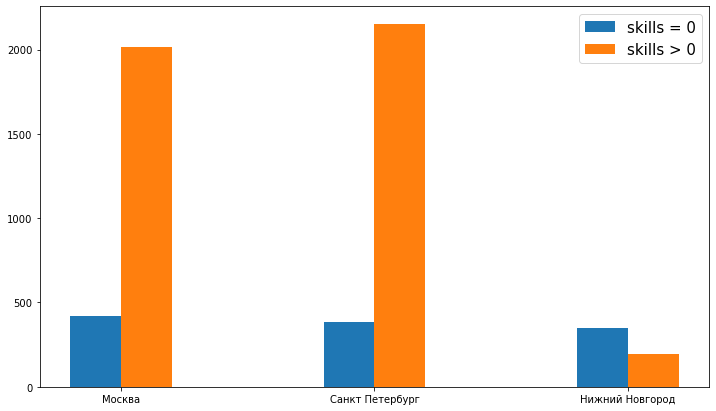

In [5]:

                  
fig, ax = plt.subplots(
    nrows=1, ncols=1,
    figsize=(12, 7)
)

bar_width = 0.2
index = np.arange(len(list(zero_counter.keys())))


ax1 = plt.bar(index - bar_width/2, zero_counter.values(), width = bar_width, label='skills = 0')
ax2 = plt.bar(index + bar_width/2, nzero_counter.values(), width = bar_width, label='skills > 0')
plt.legend(prop={"size":15})
plt.xticks(index, list(zero_counter.keys()))

In [6]:
import collections

frequency_of_skills = {}
my_counter = collections.Counter(count_skills)
my_counter = my_counter.most_common()
for item in my_counter:
    frequency_of_skills[item[0]] = item[1] 


Text(0, 0.5, 'Amount of resumes')

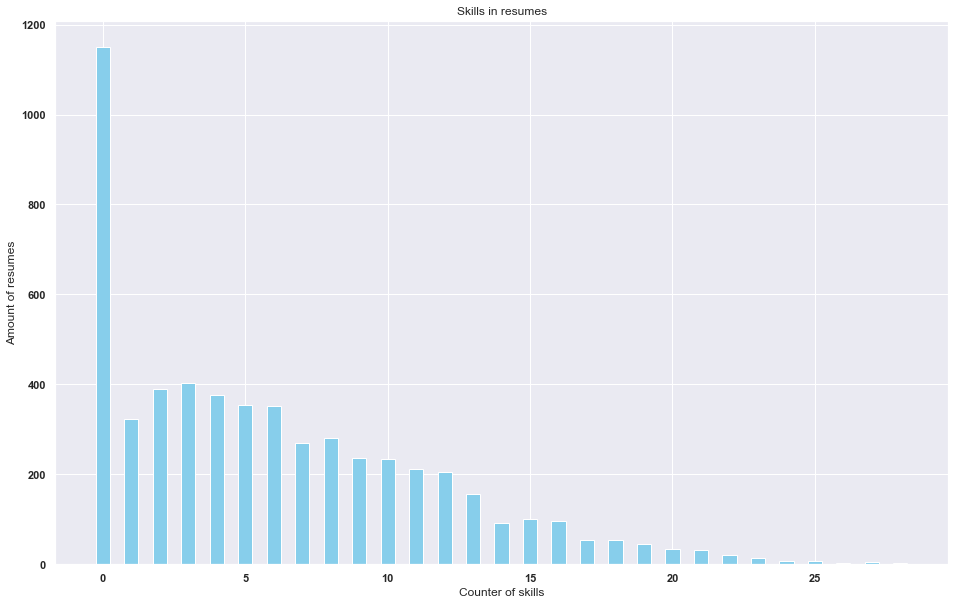

In [7]:
import seaborn as sns

sns.set()
font = {'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)

fig, ax1 = plt.subplots(
    nrows=1, ncols=1,
    figsize=(16, 10)
)
ax = plt.bar(frequency_of_skills.keys(), frequency_of_skills.values(), width=0.5, color='skyblue', capsize=40)
ax1.set_title('Skills in resumes')
ax1.set_xlabel('Counter of skills')
ax1.set_ylabel('Amount of resumes')

In [8]:
data = pd.get_dummies(data, prefix_sep="_", 
                                   columns=['city', 'exp'])
data.head(6000)

,salary,Пользователь ПК,Работа в команде,Adobe Photoshop,Управление проектами,HTML,Git,Ведение переговоров,JavaScript,CSS,Английский язык,Организаторские навыки,Linux,Настройка ПК,Грамотная речь,SQL,Настройка сетевых подключений,Ремонт ПК,Настройка ПО,HTML5,...,Обучение и развитие,Тестирование,Mac Os,Docker,Internet Marketing,Управленческие навыки,Прокладка кабелей,Подбор персонала,Joomla CMS,Графический дизайн,React,city_Москва,city_Нижний Новгород,city_Санкт Петербург,exp_1,exp_2,exp_3,exp_5,exp_6,exp_7
0,50000,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,100000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,70000,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,35000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,60000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478,120000,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
5482,50000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
5491,35000,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
5495,40000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [9]:
tmp = data.salary
data.drop(["salary"], axis = 1, inplace = True)
data['salary'] = tmp

from sklearn.ensemble import ExtraTreesClassifier

x = data.values[:, :len(data.columns) -1]
y = data.values[:, len(data.columns) -1 ] 
model = ExtraTreesClassifier()
model.fit(x, y)
columns = data.columns[:len(data.columns) -1]

tmp_data = pd.DataFrame()
tmp_data["features"] = columns
tmp_data["weights"] = model.feature_importances_
tmp_data = tmp_data.sort_values(by="weights", ascending= False)
tmp_data

,features,weights
1,Работа в команде,0.016220
9,Английский язык,0.015036
4,HTML,0.014285
14,SQL,0.013356
149,exp_2,0.013144
...,...,...
131,Контекстная реклама,0.002735
122,Google AdWords,0.002617
132,Hyper-V,0.002583
142,Joomla CMS,0.002470


In [10]:
i = 0
sum_w = 0
while sum_w < 0.90:
    sum_w += tmp_data['weights'][i]
    i += 1
    
tmp_data = tmp_data.iloc[i:]
print('List of useless:')

tmp_data

List of useless:


,features,weights
105,Поиск и привлечение клиентов,0.003548
101,Google Analytics,0.003411
87,Яндекс.Метрика,0.003407
107,Развитие продаж,0.003337
133,Организация мероприятий,0.003302
119,Windows Server 2003,0.003224
117,Windows Server 2008 R2,0.002913
108,Яндекс.Директ,0.002852
126,VPN,0.002848
100,Windows Xp,0.002818


In [11]:
data.drop([x for x in tmp_data["features"]], axis=1, inplace=True)

data = data[((data.salary - data.salary.mean()) / data.salary.std()).abs() < 1] 
data['salary_class'] = data.apply(lambda x: (x['salary'])//20000, axis=1)




In [12]:
import tkinter as tk
from tkinter import filedialog

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()

def exportCSV ():
    global data
    
    export_file_path = filedialog.asksaveasfilename(defaultextension='.csv')
    data.to_csv (export_file_path, index = False, header=True)

saveAsButton_CSV = tk.Button(text='Export CSV', command=exportCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 150, window=saveAsButton_CSV)

root.mainloop()

In [13]:
from sklearn import preprocessing


data.iloc[:,:len(data.columns) -2] = preprocessing.scale(data.iloc[:,:len(data.columns) -2])
data.mean(axis=0).round(3)
data.std(axis=0).round(3)

data.head(6000)

,Пользователь ПК,Работа в команде,Adobe Photoshop,Управление проектами,HTML,Git,Ведение переговоров,JavaScript,CSS,Английский язык,Организаторские навыки,Linux,Настройка ПК,Грамотная речь,SQL,Настройка сетевых подключений,Ремонт ПК,Настройка ПО,HTML5,Деловая переписка,...,Тестирование,Mac Os,Docker,Internet Marketing,Управленческие навыки,Прокладка кабелей,Подбор персонала,Графический дизайн,React,city_Москва,city_Нижний Новгород,city_Санкт Петербург,exp_1,exp_2,exp_3,exp_5,exp_6,exp_7,salary,salary_class
0,-0.515728,-0.493053,-0.494295,-0.397360,-0.439247,-0.403580,-0.371083,-0.384783,-0.382063,2.583690,-0.364136,-0.326736,-0.366923,2.688138,-0.320256,-0.329700,-0.338497,-0.332158,-0.328714,-0.333627,...,-0.156975,-0.140254,-0.122562,-0.160475,-0.146022,-0.146022,-0.144123,-0.151589,-0.148829,1.126919,-0.221520,-1.0257,1.354421,-0.681051,-0.467212,-0.300815,-0.201752,-0.173032,50000,2
1,-0.515728,-0.493053,-0.494295,2.516611,-0.439247,-0.403580,-0.371083,-0.384783,-0.382063,-0.387043,-0.364136,-0.326736,-0.366923,-0.372005,-0.320256,-0.329700,-0.338497,-0.332158,-0.328714,-0.333627,...,-0.156975,-0.140254,-0.122562,-0.160475,6.848265,-0.146022,-0.144123,-0.151589,-0.148829,1.126919,-0.221520,-1.0257,-0.738323,-0.681051,-0.467212,-0.300815,4.956568,-0.173032,100000,5
2,-0.515728,-0.493053,-0.494295,-0.397360,-0.439247,2.477826,-0.371083,2.598865,-0.382063,-0.387043,-0.364136,-0.326736,-0.366923,-0.372005,-0.320256,-0.329700,-0.338497,-0.332158,-0.328714,-0.333627,...,-0.156975,-0.140254,-0.122562,-0.160475,-0.146022,-0.146022,-0.144123,-0.151589,-0.148829,1.126919,-0.221520,-1.0257,-0.738323,1.468320,-0.467212,-0.300815,-0.201752,-0.173032,70000,3
3,1.939007,2.028180,-0.494295,-0.397360,-0.439247,-0.403580,-0.371083,-0.384783,-0.382063,2.583690,-0.364136,-0.326736,-0.366923,-0.372005,-0.320256,-0.329700,-0.338497,-0.332158,-0.328714,-0.333627,...,-0.156975,-0.140254,-0.122562,-0.160475,-0.146022,-0.146022,-0.144123,-0.151589,-0.148829,1.126919,-0.221520,-1.0257,1.354421,-0.681051,-0.467212,-0.300815,-0.201752,-0.173032,35000,1
4,-0.515728,-0.493053,-0.494295,-0.397360,-0.439247,-0.403580,-0.371083,-0.384783,-0.382063,-0.387043,-0.364136,-0.326736,-0.366923,-0.372005,-0.320256,-0.329700,-0.338497,-0.332158,-0.328714,-0.333627,...,-0.156975,-0.140254,-0.122562,-0.160475,-0.146022,-0.146022,-0.144123,-0.151589,-0.148829,1.126919,-0.221520,-1.0257,-0.738323,1.468320,-0.467212,-0.300815,-0.201752,-0.173032,60000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478,-0.515728,-0.493053,2.023083,2.516611,-0.439247,-0.403580,-0.371083,-0.384783,-0.382063,-0.387043,-0.364136,-0.326736,-0.366923,2.688138,-0.320256,-0.329700,-0.338497,-0.332158,-0.328714,-0.333627,...,-0.156975,-0.140254,-0.122562,-0.160475,-0.146022,-0.146022,-0.144123,-0.151589,-0.148829,-0.887375,4.514259,-1.0257,-0.738323,-0.681051,2.140355,-0.300815,-0.201752,-0.173032,120000,6
5482,-0.515728,-0.493053,-0.494295,-0.397360,-0.439247,-0.403580,-0.371083,-0.384783,-0.382063,-0.387043,-0.364136,-0.326736,-0.366923,-0.372005,-0.320256,3.033061,-0.338497,-0.332158,-0.328714,-0.333627,...,-0.156975,-0.140254,-0.122562,-0.160475,-0.146022,-0.146022,-0.144123,-0.151589,-0.148829,-0.887375,4.514259,-1.0257,-0.738323,-0.681051,-0.467212,3.324298,-0.201752,-0.173032,50000,2
5491,1.939007,-0.493053,-0.494295,-0.397360,-0.439247,-0.403580,-0.371083,-0.384783,-0.382063,-0.387043,-0.364136,-0.326736,2.725365,2.688138,-0.320256,3.033061,-0.338497,-0.332158,-0.328714,-0.333627,...,-0.156975,-0.140254,-0.122562,-0.160475,-0.146022,6.848265,-0.144123,-0.151589,-0.148829,-0.887375,4.514259,-1.0257,-0.738323,-0.681051,2.140355,-0.300815,-0.201752,-0.173032,35000,1
5495,-0.515728,-0.493053,-0.494295,-0.397360,-0.439247,-0.403580,-0.371083,-0.384783,-0.382063,-0.387043,-0.364136,-0.326736,-0.366923,-0.372005,-0.320256,-0.329700,-0.338497,-0.332158,-0.328714,-0.333627,...

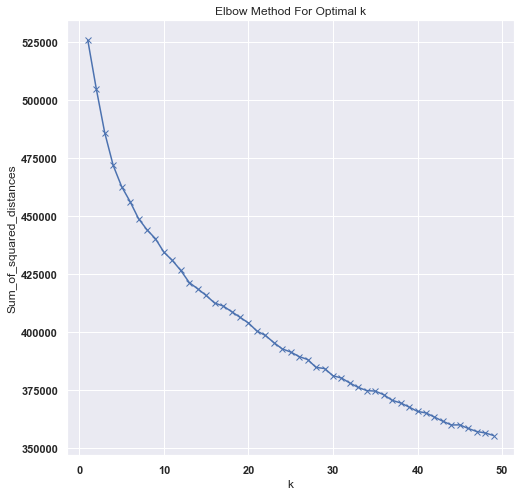

In [14]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler



new_data = data.drop(['salary','salary_class'],axis=1)
new_data.head()
scaler = StandardScaler()
scaler.fit(new_data)
StandardScaler()
new_data = (scaler.transform(new_data))

Sum_of_squared_distances = []
K = range(1,50)
for k in K:
    km = KMeans(n_clusters=k, init = 'k-means++', max_iter = 1000, n_init = 10, random_state=0)
    km = km.fit(new_data)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.figure(figsize=(8, 8))    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

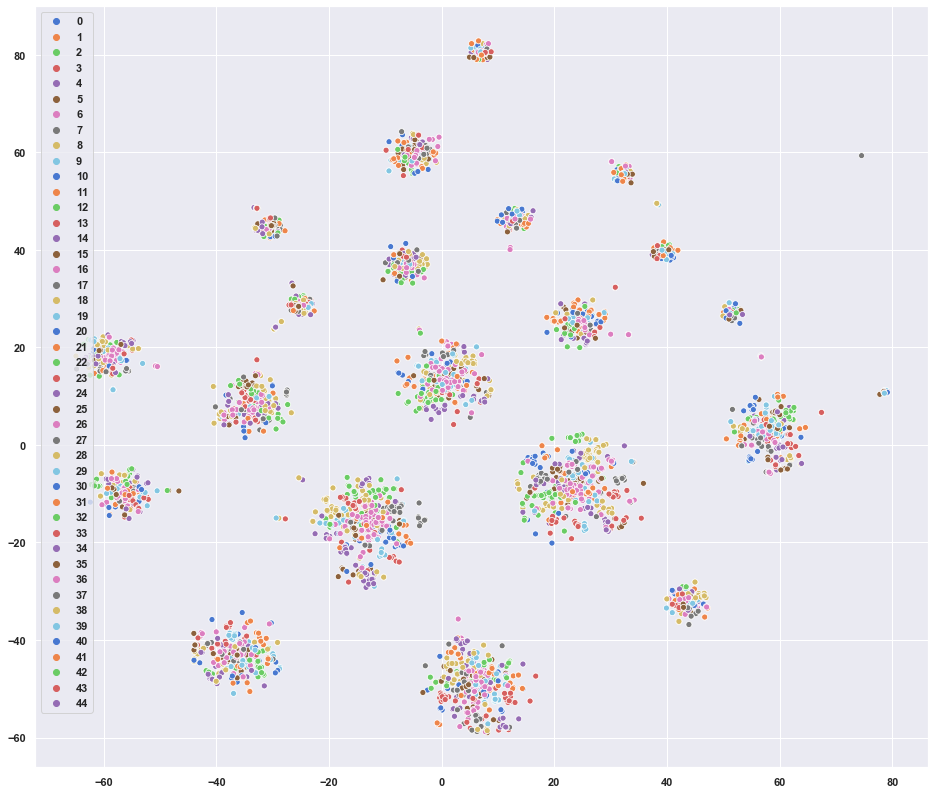

In [15]:


tsne_d = TSNE(random_state=123,early_exaggeration=12).fit_transform(data)
current_p = sns.color_palette("muted")
cmap = ListedColormap(sns.color_palette(current_p).as_hex())

def results(data, predictions): 
    
    plt.figure(figsize=(16, 14))
    sns.scatterplot(tsne_d[:,0], tsne_d[:,1], hue=predictions, legend='full', palette='muted')

def kmean(data, n):
    kmeans = KMeans(n_clusters=n, init = 'k-means++', max_iter = 1000, n_init = 10, random_state=0)
    kmeans.fit(data)
    predictions = kmeans.predict(data)
    return predictions

predictions = kmean(new_data, 45)
results(new_data, predictions)

In [16]:
cluster_list = []
for i in range(45):
    list_of_salaries = []
    for item in range(0,len(data)):
        if i == predictions[item]:
            list_of_salaries.append(data.iloc[item][-2])
    cluster_list.append(list_of_salaries)

mean_of_clusters = []
number = 0
for cluster in cluster_list:
    mean_of_clusters.append(sum(cluster)/len(cluster))

mean_of_clusters = sorted(mean_of_clusters)

for i in mean_of_clusters:
    print(str(number) + ': mean of salary = '+'%.4f'% i)
    number += 1

0: mean of salary = 49000.0000
1: mean of salary = 49811.7647
2: mean of salary = 52300.8130
3: mean of salary = 52745.3704
4: mean of salary = 53324.5614
5: mean of salary = 53964.2857
6: mean of salary = 54169.3182
7: mean of salary = 54477.4648
8: mean of salary = 54681.8182
9: mean of salary = 55376.6234
10: mean of salary = 55840.6593
11: mean of salary = 57612.9032
12: mean of salary = 58412.6984
13: mean of salary = 58525.3165
14: mean of salary = 59049.1803
15: mean of salary = 61166.6667
16: mean of salary = 62314.3673
17: mean of salary = 63099.9800
18: mean of salary = 63355.7766
19: mean of salary = 66020.5479
20: mean of salary = 67275.8621
21: mean of salary = 68464.2857
22: mean of salary = 69662.3377
23: mean of salary = 69769.2308
24: mean of salary = 70229.8851
25: mean of salary = 70259.2593
26: mean of salary = 70263.1579
27: mean of salary = 71038.9610
28: mean of salary = 71367.3469
29: mean of salary = 71985.0597
30: mean of salary = 72684.2105
31: mean of salary

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
    from sklearn.tree import DecisionTreeClassifier
from statistics import mean
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
import warnings
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
warnings.filterwarnings('ignore')

def plots_and_metrics_mc(Ytest, Ypred):
    print(classification_report(Ytest, Ypred))
    print("Accuracy: ", round(metrics.accuracy_score(Ytest, Ypred), 5),
          "\nBalanced accuracy: ", round(metrics.balanced_accuracy_score(Ytest, Ypred), 5))
    display(pd.DataFrame(confusion_matrix(Ytest, Ypred)))

In [18]:
def ds_mc(data):
    (Xtrain, Xtest, Ytrain, Ytest) = train_test_split(data.drop(['salary','salary_class'],axis=1),
                                                      data['salary_class'], test_size=0.25, shuffle=True)
    depths = []
    avg_scores = []
    for i in range(5, 100):
        ds_model = DecisionTreeClassifier(max_depth=i)
        ds_model.fit(Xtrain, Ytrain)
        scores = cross_val_score(ds_model, data.drop(['salary','salary_class'], axis=1),
                                 data['salary_class'], cv=10)
        avg_score = mean(scores)*100
        avg_scores.append(avg_score)
        depths.append(i)
    print("Best parametr of depth: ", depths[avg_scores.index(max(avg_scores))])    
    ds_model = DecisionTreeClassifier(max_depth=depths[avg_scores.index(max(avg_scores))])
    ds_model.fit(Xtrain, Ytrain)
    Ypred = ds_model.predict(Xtest)
    plots_and_metrics_mc(Ytest, Ypred)
    return Ypred

a = ds_mc(data)

Best parametr of depth:  6
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.61      0.15      0.24       134
           2       0.36      0.74      0.48       284
           3       0.28      0.27      0.27       235
           4       0.19      0.10      0.13       130
           5       0.18      0.03      0.05        97
           6       0.00      0.00      0.00        48
           7       0.00      0.00      0.00        15

    accuracy                           0.33       946
   macro avg       0.20      0.16      0.15       946
weighted avg       0.30      0.33      0.27       946

Accuracy:  0.32875 
Balanced accuracy:  0.16193


,0,1,2,3,4,5,6,7
0,0,0,2,1,0,0,0,0
1,0,20,90,21,1,2,0,0
2,0,6,211,56,7,3,1,0
3,0,6,146,64,14,5,0,0
4,0,0,75,40,13,2,0,0
5,0,1,48,29,16,3,0,0
6,0,0,17,16,13,2,0,0
7,0,0,4,5,6,0,0,0


In [19]:
def log_regression_mc(data):
    (Xtrain, Xtest, Ytrain, Ytest) = train_test_split(data.drop(['salary','salary_class'],axis=1),
                                                      data['salary_class'], test_size=0.25, shuffle=True)
    lgr_model = LogisticRegression()
    lgr_model.fit(Xtrain, Ytrain)
    Ypred = lgr_model.predict(Xtest)
    
    plots_and_metrics_mc(Ytest, Ypred)
    return Ypred

b = log_regression_mc(data)

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.42      0.32      0.36       140
           2       0.39      0.57      0.46       306
           3       0.29      0.24      0.26       220
           4       0.24      0.20      0.21       122
           5       0.20      0.15      0.17        78
           6       0.20      0.12      0.15        64
           7       0.11      0.07      0.09        14

    accuracy                           0.33       946
   macro avg       0.27      0.27      0.26       946
weighted avg       0.32      0.33      0.32       946

Accuracy:  0.33404 
Balanced accuracy:  0.27127


,0,1,2,3,4,5,6,7
0,1,0,0,1,0,0,0,0
1,0,45,69,16,4,4,1,1
2,1,44,173,46,24,13,5,0
3,1,10,115,52,22,12,7,1
4,0,6,45,26,24,11,9,1
5,0,2,19,20,12,12,10,3
6,0,1,18,14,14,7,8,2
7,0,0,5,4,2,1,1,1


In [20]:
def knn_mc(data):
    (Xtrain, Xtest, Ytrain, Ytest) = train_test_split(data.drop(['salary','salary_class'],axis=1),
                                                      data['salary_class'], test_size=0.25, shuffle=True)
    
    n_ns = []
    avg_scores = []
    for i in range(1, 100):
        knnModel = KNeighborsClassifier(n_neighbors=i)
        knnModel.fit(Xtrain, Ytrain)
        scores = cross_val_score(knnModel,data.drop(['salary','salary_class'],axis=1),
                                                      data['salary_class'] , cv=10)
        avg_score = mean(scores)*100
        avg_scores.append(avg_score)
        n_ns.append(i)
    knn_model = KNeighborsClassifier(n_neighbors=n_ns[avg_scores.index(max(avg_scores))])
    knn_model.fit(Xtrain, Ytrain)
    Ypred = knn_model.predict(Xtest)
    
    plots_and_metrics_mc(Ytest, Ypred)
    return Ypred

c = knn_mc(data)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.42      0.25      0.31       131
           2       0.34      0.74      0.47       298
           3       0.23      0.18      0.20       222
           4       0.26      0.07      0.11       137
           5       0.50      0.01      0.02        85
           6       0.50      0.02      0.03        59
           7       0.00      0.00      0.00        12

    accuracy                           0.32       946
   macro avg       0.28      0.16      0.14       946
weighted avg       0.33      0.32      0.26       946

Accuracy:  0.32347 
Balanced accuracy:  0.15943


,0,1,2,3,4,5,6,7
0,0,0,2,0,0,0,0,0
1,0,33,86,12,0,0,0,0
2,0,29,221,42,6,0,0,0
3,0,10,163,40,9,0,0,0
4,0,2,85,39,10,0,1,0
5,0,3,54,18,9,1,0,0
6,0,2,31,20,4,1,1,0
7,0,0,6,6,0,0,0,0


In [21]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression, Lasso, Ridge


#функция изображения графиков и использования различных метрик
def plots_and_metrics(Ytest, Ypred, name):
    plt.plot(Ytest[1:300].values, 'b-', label='Correct')
    plt.plot(Ypred[1:300], 'r-', label='Predicted')
    plt.xlabel("Observations: " + name)
    plt.ylabel("salary class")
    plt.legend(loc='best')
    plt.show()
    
    MSE = metrics.mean_squared_error(y_pred=Ypred, y_true=Ytest) 
    RMSE = np.sqrt(MSE)
    MAE = metrics.mean_absolute_error(y_pred=Ypred, y_true=Ytest)
    MEDIAN = metrics.median_absolute_error(y_pred=Ypred, y_true=Ytest)
    R2 = metrics.r2_score(y_pred=Ypred, y_true=Ytest) 

    print(f"MSE: {MSE}\nRMSE:  {RMSE}\nR2:    {R2}\nMAE:   {MAE}\nMedae: {MEDIAN}")   

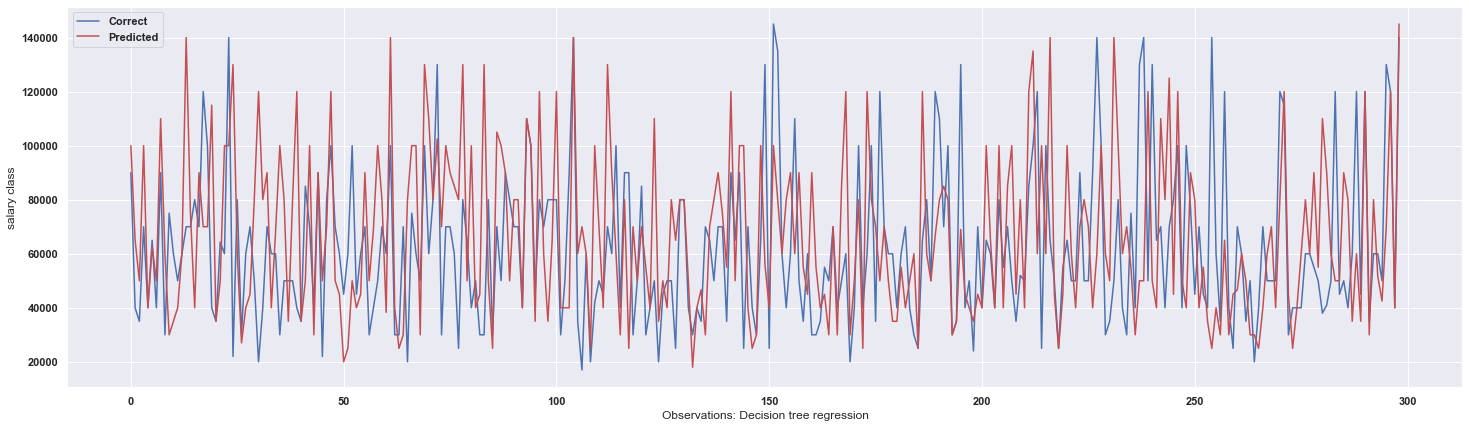

MSE: 1094836927.8044398
RMSE:  33088.320111550536
R2:    -0.3281097317513779
MAE:   24977.998238195916
Medae: 20000.0


array([100000.        , 100000.        ,  65000.        ,  50000.        ,
       100000.        ,  40000.        ,  62500.        ,  50000.        ,
       110000.        ,  60000.        ,  30000.        ,  35000.        ,
        40000.        ,  60000.        , 140000.        ,  75000.        ,
        40000.        ,  90000.        ,  70000.        ,  70000.        ,
       115000.        ,  35000.        ,  50000.        , 100000.        ,
       100000.        , 130000.        ,  60000.        ,  27000.        ,
        40000.        ,  45000.        ,  80000.        , 120000.        ,
        80000.        ,  90000.        ,  40000.        ,  68000.        ,
       100000.        ,  80000.        ,  35000.        ,  80000.        ,
       120000.        ,  35000.        ,  50000.        , 100000.        ,
        30000.        ,  90000.        ,  50000.        ,  70000.        ,
       120000.        ,  50000.        ,  45000.        ,  20000.        ,
        25000.        ,  

In [22]:
#деревья решений
def ds_regression(data):
    (Xtrain, Xtest, Ytrain, Ytest) = train_test_split(data.drop(['salary','salary_class'],axis=1), 
                                                      data['salary'], test_size=0.25, shuffle=True)
    
    ds_model = DecisionTreeRegressor(random_state=6)
    ds_model.fit(Xtrain, Ytrain)
    Ypred = ds_model.predict(Xtest)
    plots_and_metrics(Ytest, Ypred, 'Decision tree regression')
    return Ypred

plt.figure(figsize=(25, 7))
ds_regression(data)

      Пользователь ПК  Работа в команде  Adobe Photoshop  \
383         -0.515728         -0.493053        -0.494295   
2952        -0.515728         -0.493053        -0.494295   
1312        -0.515728         -0.493053        -0.494295   
3380        -0.515728         -0.493053        -0.494295   
335         -0.515728         -0.493053        -0.494295   
...               ...               ...              ...   
316          1.939007          2.028180        -0.494295   
1159        -0.515728         -0.493053        -0.494295   
3314        -0.515728         -0.493053        -0.494295   
4530        -0.515728         -0.493053        -0.494295   
4101        -0.515728         -0.493053        -0.494295   

      Управление проектами      HTML       Git  Ведение переговоров  \
383               -0.39736 -0.439247  2.477826            -0.371083   
2952              -0.39736  2.276622  2.477826            -0.371083   
1312              -0.39736 -0.439247 -0.403580            -0.37108

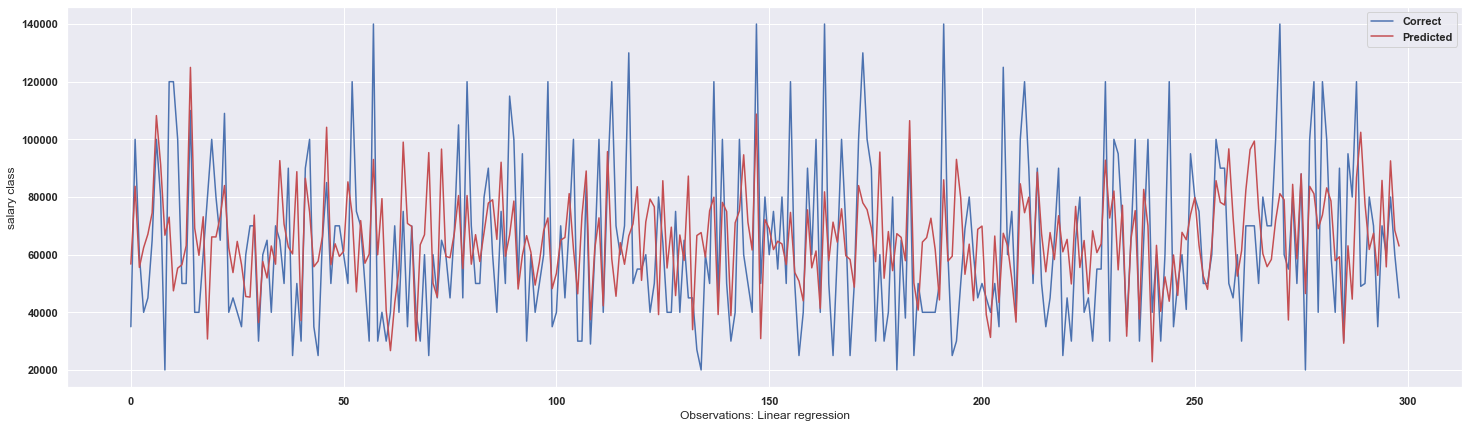

MSE: 623928621.4594903
RMSE:  24978.56323849493
R2:    0.226570186313094
MAE:   19642.120508936034
Medae: 16219.87281976745


array([ 87626.12281977,  56714.12281977,  83706.12281977,  55586.12281977,
        62418.12281977,  67102.12281977,  74456.12281977, 108242.12281977,
        91242.12281977,  66742.12281977,  73016.12281977,  47450.12281977,
        55306.12281977,  56506.12281977,  63126.12281977, 124954.12281977,
        69186.12281977,  59762.12281977,  73146.12281977,  30742.12281977,
        66153.62281977,  66142.12281977,  73294.12281977,  83976.37281977,
        62394.12281977,  53782.12281977,  64594.12281977,  56552.12281977,
        45474.12281977,  45274.12281977,  73722.12281977,  36458.12281977,
        57634.12281977,  51914.12281977,  63010.12281977,  56690.12281977,
        92614.12281977,  70570.12281977,  62654.12281977,  60258.12281977,
        88776.12281977,  37096.37281977,  86514.12281977,  74778.12281977,
        55810.12281977,  57734.12281977,  66114.12281977, 104186.12281977,
        56506.12281977,  63770.12281977,  59390.12281977,  61160.12281977,
        85246.12281977,  

In [23]:
#линейная регрессия
def linear_regression(data):
    (Xtrain, Xtest, Ytrain, Ytest) = train_test_split(data.drop(['salary','salary_class'],axis=1), 
                                                      data['salary'], test_size=0.25, shuffle=True)
    model = LinearRegression()
    model.fit(Xtrain, Ytrain)
    Ypred = model.predict(Xtest)
    print(Xtest)
    plots_and_metrics(Ytest, Ypred, 'Linear regression')
    return Ypred

plt.figure(figsize=(25, 7))
linear_regression(data)

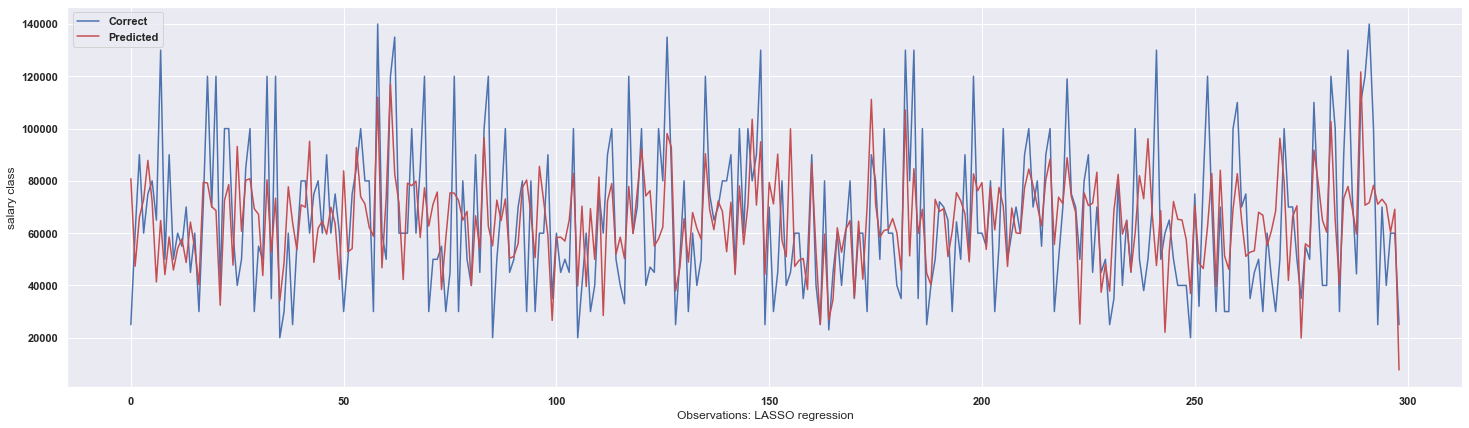

MSE: 582979685.7210394
RMSE:  24144.972265899156
R2:    0.26804180848575865
MAE:   19210.814273353382
Medae: 16525.81699571911


array([ 60621.58752888,  80812.00055602,  47376.72346989,  65985.25726064,
        72868.92192068,  87838.47388609,  72013.54656584,  41329.5243337 ,
        64849.47054385,  44142.49152584,  58533.36244219,  45911.65760141,
        54149.51334177,  57793.7476586 ,  48768.82105901,  64230.9396663 ,
        54196.11676461,  40294.51604063,  79465.61553387,  79187.76568271,
        70114.44096222,  68658.22675341,  32426.96779781,  72555.0464641 ,
        78571.445313  ,  47781.34704281,  93158.60672361,  60738.43321927,
        80230.24698594,  80846.52462414,  69328.47897726,  67203.86197823,
        43761.58553798,  80355.34693269,  52642.94770851,  73376.71757129,
        34111.16858843,  48790.0842197 ,  77740.12052483,  64126.97865518,
        53752.21642282,  70815.77157269,  69918.33855133,  95131.34601855,
        48836.04524356,  61890.06962367,  64628.04333761,  59598.13945942,
        69914.04492256,  63670.81153304,  42327.76190392,  83842.02791353,
        52878.43323621,  

In [24]:
#регрессия LASSO
def lasso_regression(data):
    (Xtrain, Xtest, Ytrain, Ytest) = train_test_split(data.drop(['salary','salary_class'],axis=1), 
                                                      data['salary'], test_size=0.25, shuffle=True)
    
    alphas = []
    avg_scores = []
    for i in range(1, 100):
        lassoModel = Lasso(alpha=(i * 0.2))
        lassoModel.fit(Xtrain, Ytrain)
        scores = cross_val_score(lassoModel, data.drop(['salary','salary_class'], axis=1), data['salary'], cv=10)
        avg_score = mean(scores)*100
        avg_scores.append(avg_score)
        alphas.append(i * 0.25)
    lasso_model = Lasso(alpha=alphas[avg_scores.index(max(avg_scores))])
    lasso_model.fit(Xtrain, Ytrain)
    Ypred = lasso_model.predict(Xtest)
    
    plots_and_metrics(Ytest, Ypred, 'LASSO regression')
    return Ypred
plt.figure(figsize=(25, 7))
lasso_regression(data)

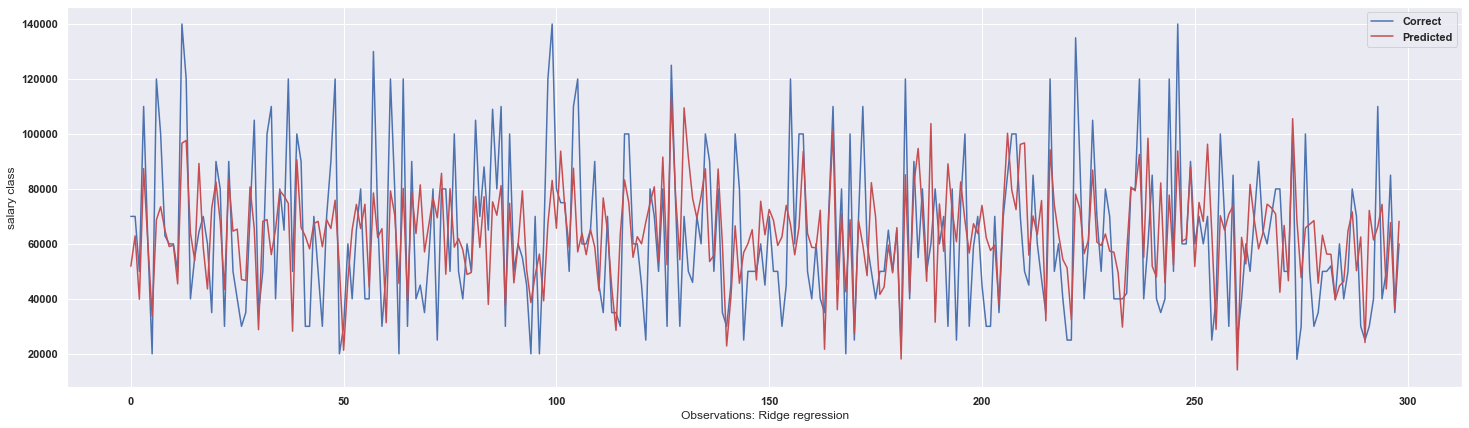

MSE: 563186304.3525637
RMSE:  23731.546606838834
R2:    0.2837019440028683
MAE:   18874.0111256337
Medae: 15543.53162382987


array([ 55424.90638584,  51870.24048801,  62913.04906085,  39854.51516652,
        87392.37173643,  60192.11848992,  33704.84689395,  68718.18461414,
        73501.70813104,  65060.85120535,  59030.05041083,  59546.55829755,
        45457.15140799,  96645.21176097,  97648.21928751,  63948.22977616,
        54006.92345344,  89258.84521061,  58774.02499371,  43631.76806414,
        72983.17854895,  82507.05956582,  68122.41524186,  43474.98729712,
        83546.42108868,  64634.81036685,  65371.44865649,  47023.52455823,
        46686.96605535,  80716.76464291,  65452.8524099 ,  28786.01737431,
        68190.93095447,  68855.78329855,  56095.23868832,  65257.5604998 ,
        79354.43447084,  77432.79028652,  74709.33307254,  28217.99405373,
        90618.9429222 ,  65935.5112157 ,  62794.39463437,  58185.73315715,
        67412.74396168,  68197.73136793,  58938.33841077,  68807.87202613,
        65602.9970007 ,  75872.3062087 ,  51443.78540084,  21299.60996027,
        47069.16900035,  

In [25]:
#гребневая регрессия
def ridge_regression(data):
    (Xtrain, Xtest, Ytrain, Ytest) = train_test_split(data.drop(['salary','salary_class'],axis=1), 
                                                      data['salary'], test_size=0.25, shuffle=True)
    
    alphas = []
    avg_scores = []
    for i in range(1, 100):
        ridgeModel = Ridge(alpha=(i * 0.2))
        ridgeModel.fit(Xtrain, Ytrain)
        scores = cross_val_score(ridgeModel, data.drop(['salary','salary_class'],axis=1), 
                                                      data['salary'], cv=10)
        avg_score = mean(scores)*100
        avg_scores.append(avg_score)
        alphas.append(i * 0.25)
    ridge_model = Ridge(alpha=alphas[avg_scores.index(max(avg_scores))])
    ridge_model.fit(Xtrain, Ytrain)
    Ypred = ridge_model.predict(Xtest)
    
    plots_and_metrics(Ytest, Ypred, 'Ridge regression')
    return Ypred
                                

plt.figure(figsize=(25, 7))
ridge_regression(data)